# VideoLLaMA3 Inference Recipes

## Section 1: Single Image Understanding

We here show the best recipes to understand a single image with VideoLLaMA3. Specifically, we provide samples to cover the following cases:

1. Understand a `Comman Image`: We demonstrate how to effectively analyze and derive meaningful insights from common images.

2. Analyse `Charts`: Discover how VideoLLaMA3 can accurately extract valuable information from charts.

3. Understand `Tables`: Learn how to accurately decode and interpret visual data organized in tabular formats, enabling a deeper comprehension of structured information.

4. Understand `Documents`: Explain how VideoLLaMA3 can be leveraged to interpret the visual and textual elements of documents, enabling users to extract relevant information, understand context, and enhance document analysis capabilities.

5. Solve `Algorithm Problems`: Discover how VideoLLaMA3 can assist in addressing algorithmic challenges.

### [General] Load Model and Processor

Loading the model requires approximately 15,967 MB of VRAM at BFloat16 precision. To ensure that only one GPU is used, we restrict the CUDA visible devices to GPU 0 in this example code.

In [ ]:
!pip install torch==2.4.0 torchvision==0.17.0 --extra-index-url https://download.pytorch.org/whl/cu118

!pip install flash-attn --no-build-isolation
!pip install transformers==4.46.3 accelerate==1.0.1
!pip install decord ffmpeg-python imageio opencv-python

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from PIL import Image
from IPython.display import Markdown, display
import matplotlib.pyplot as plt

import torch
from transformers import AutoModelForCausalLM, AutoProcessor, AutoModel, AutoImageProcessor

model_path = "DAMO-NLP-SG/VideoLLaMA3-7B-Image"
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    trust_remote_code=True,
    device_map="auto",
    torch_dtype=torch.bfloat16,
    attn_implementation="flash_attention_2",
)
processor = AutoProcessor.from_pretrained(model_path, trust_remote_code=True)

/opt/lepton/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


### 1. Understand a Common Image

Load the image and display:

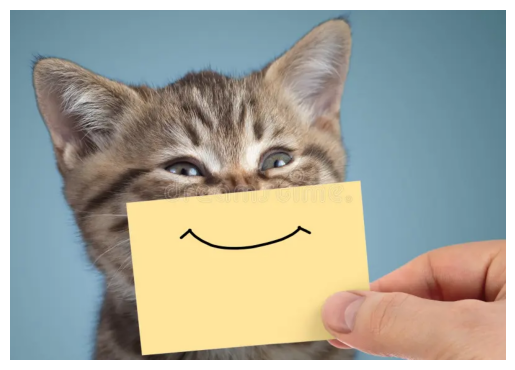

In [ ]:
image_path = "visuals/cat.jpg"
image = Image.open(image_path).convert("RGB")

plt.imshow(image)
plt.axis('off')
plt.show()

Fill in the conversation here and get the answer:

In [ ]:
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": {"image_path": image_path}
            },
            {
                "type": "text",
                "text": "What is funny in the image?"},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=256)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))


The humor in this image comes from the unexpected combination of a cute kitten and a smiley face. The person is holding up a yellow sticky note with a simple black smiley face drawn on it, which is positioned in front of the kitten's face. This creates an amusing visual pun where the kitten appears to be smiling or laughing, even though its own face isn't visible.

This setup plays on the common association between cats and their playful, mischievous nature. By placing the smiley face right in front of the kitten's face, it gives the impression that the kitten itself is happy and content, which is often how people anthropomorphize cats.

The contrast between the real, adorable kitten and the artificial, hand-drawn smiley face adds an extra layer of humor to the image. It's a clever way to combine two elements that are typically associated with joy and cuteness - the innocent expression of a young cat and the universally recognized symbol of happiness.

### 2. Analyse Charts

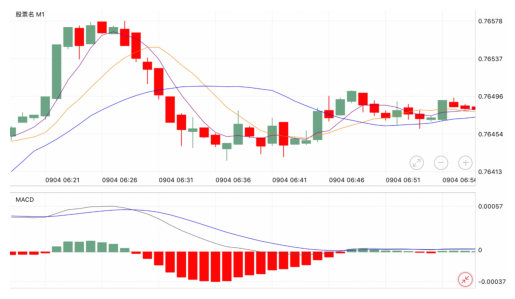

In [ ]:
image_path = "visuals/chart.jpg"
image = Image.open(image_path).convert("RGB")

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": {"image_path": image_path}
            },
            {
                "type": "text",
                "text": "What do you think of this stock? Is it worth holding? Why?"},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=256)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))


The stock shown in the image appears to be in a downtrend, with the price decreasing over time. The red candlesticks indicate that the closing price was lower than the opening price for most of the period shown. Additionally, the MACD line is below the zero line, which typically suggests a bearish signal.

Given this information, it doesn't seem like a particularly strong investment opportunity at the moment. The downward trend and negative MACD values suggest that the stock is likely facing challenges or has a generally pessimistic outlook.

However, it's important to note that stock analysis should always be done in conjunction with other factors such as company fundamentals, industry trends, and broader market conditions. Without more context, I can't provide a definitive answer on whether this stock is worth holding.

If you're considering investing in this stock, I'd recommend doing further research and consulting with a financial advisor before making any decisions.

### 3. Understand Tables

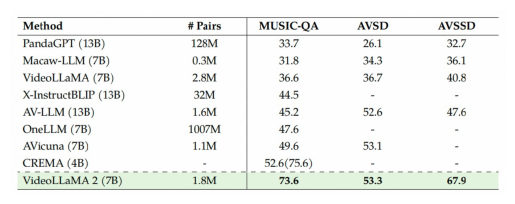

In [ ]:
image_path = "visuals/table.jpg"
image = Image.open(image_path).convert("RGB")

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": {"image_path": image_path}
            },
            {
                "type": "text",
                "text": "Change the table into markdown format."},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=512)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))


Here's the table converted to markdown format:

| Method | #Pairs | MUSICQA | AVSD | AVSSD |
|:--|:--:|:--:|:--:|:--:|
| Pandal-GPT (13B) | 128M | 33.7 | 26.1 | 32.7 |
| Macaw-LLM (7B) | 0.3M | 31.8 | 34.3 | 36.1 |
| VideoLLaMA (7B) | 2.8M | 36.6 | 36.7 | 40.8 |
| X-Instruction-BLP (13B) | 32M | 44.5 | . | . |
| AV-LLM (13B) | 1.6M | 45.2 | 53.6 | 47.6 |
| GPT-LLM (7B) | 100M | 49.6 | . | . |
| Avicenna (7B) | 1.1M | 49.6 | 53.1 | . |
| CREMA (7B) | . | 53.6 | 75.6 | . |
| VideoLLaMA 2 (7B) | 1.8M | 73.6 | 53.3 | 67.9 |

This table shows a comparison of different models and their performance metrics, including number of pairs, MUSICQA score, AVSD score, and AVSSD score. The table is formatted with column headers and rows for each method being compared.

### 4. Understand Documents

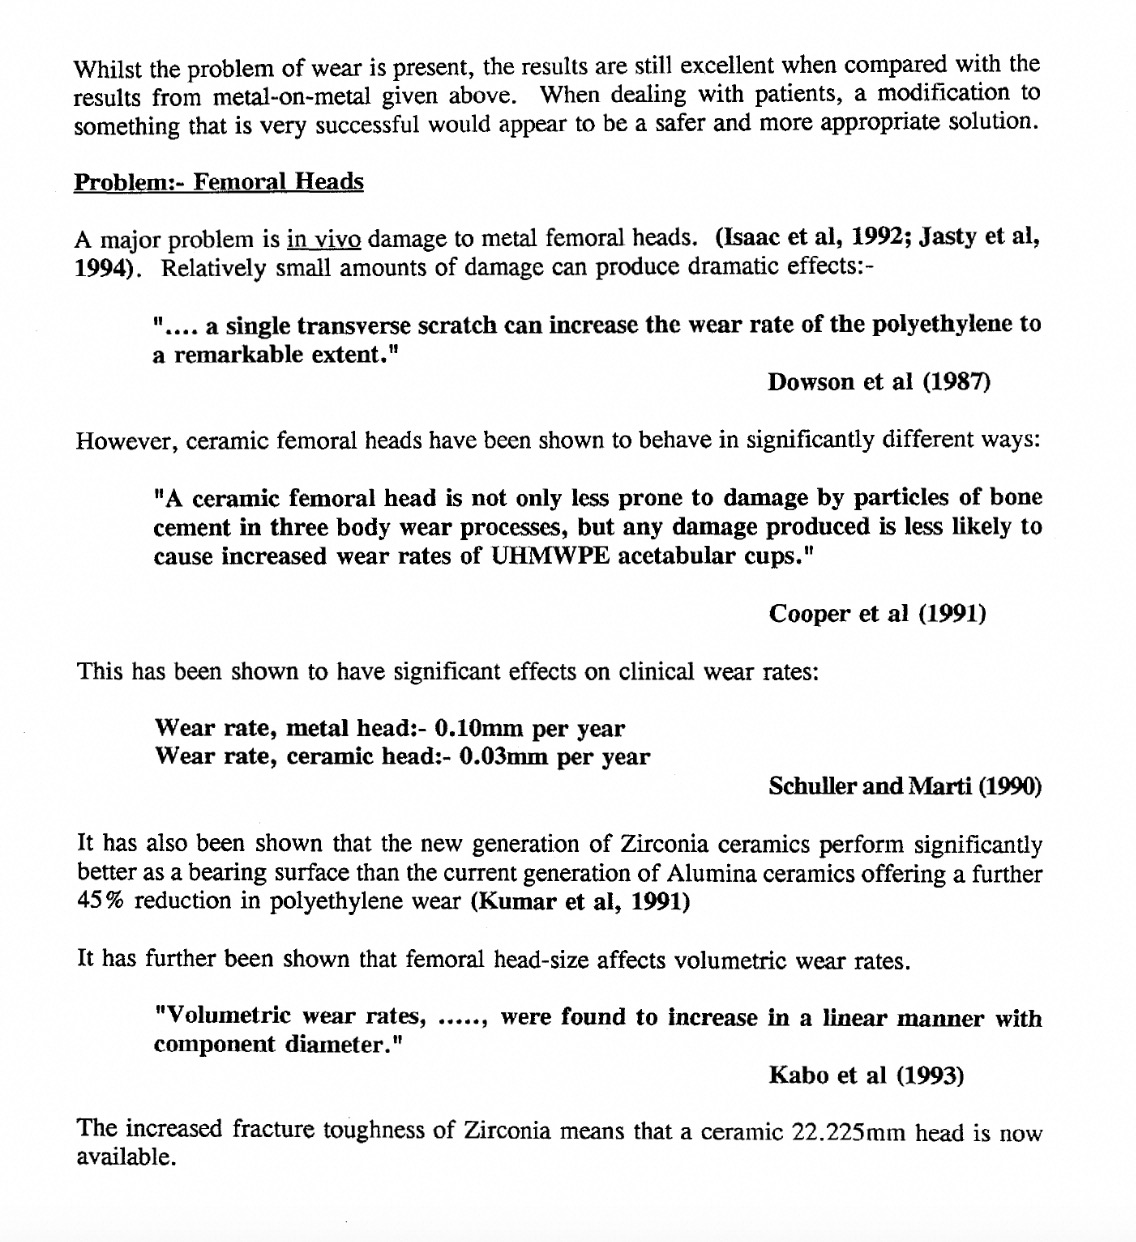

In [ ]:
image_path = "visuals/doc.jpg"
image = Image.open(image_path).convert("RGB")

display(image)

In [ ]:
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": {"image_path": image_path}
            },
            {
                "type": "text",
                "text": "Please parse all the text in the document, from left to right, from top to bottom. Please add line breaks in appropriate places."},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=1024)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
response = response.replace('\n', '<br>')
display(Markdown(response))


Here is the text from the document, with line breaks added in appropriate places:<br><br>Whilst the problem of wear is present, the results are still excellent when compared with the<br>results from metal-on-metal given above. When dealing with patients, a modification to<br>something that is very successful would appear to be a safer and more appropriate solution.<br><br>Problem:- Femoral Heads<br><br>A major problem is in vivo damage to metal femoral heads. (Isaac et al, 1992; Jasty et al,<br>1994). Relatively small amounts of damage can produce dramatic effects:-<br>"..... a single transverse scratch can increase the wear rate of the polyethylene to<br>a remarkable extent." Dowson et al (1987)<br><br>However, ceramic femoral heads have been shown to behave in significantly different ways:<br>"A ceramic femoral head is not only less prone to damage by particles of bone<br>cement in three body wear processes, but any damage produced is less likely to<br>cause increased wear rates of UHMWPE acetabular cups." Cooper et al (1991)<br><br>This has been shown to have significant effects on clinical wear rates:<br>Wear rate, metal head:- 0.10mm per year<br>Wear rate, ceramic head:- 0.03mm per year<br><br>Schuller and Marti (1990)<br>It has also been shown that the new generation of Zirconia ceramics perform significantly<br>better as a bearing surface than the current generation of Alumina ceramics offering a further<br>45% reduction in polyethylene wear (Kumar et al, 1991)<br><br>It has further been shown that femoral head-size affects volumetric wear rates.<br>"Volumetric wear rates, ...., were found to increase in a linear manner with<br>component diameter." Kabo et al (1993)<br><br>The increased fracture toughness of Zirconia means that a ceramic 22.225mm head is now<br>available.

### 5. Solve Algorithm Problems

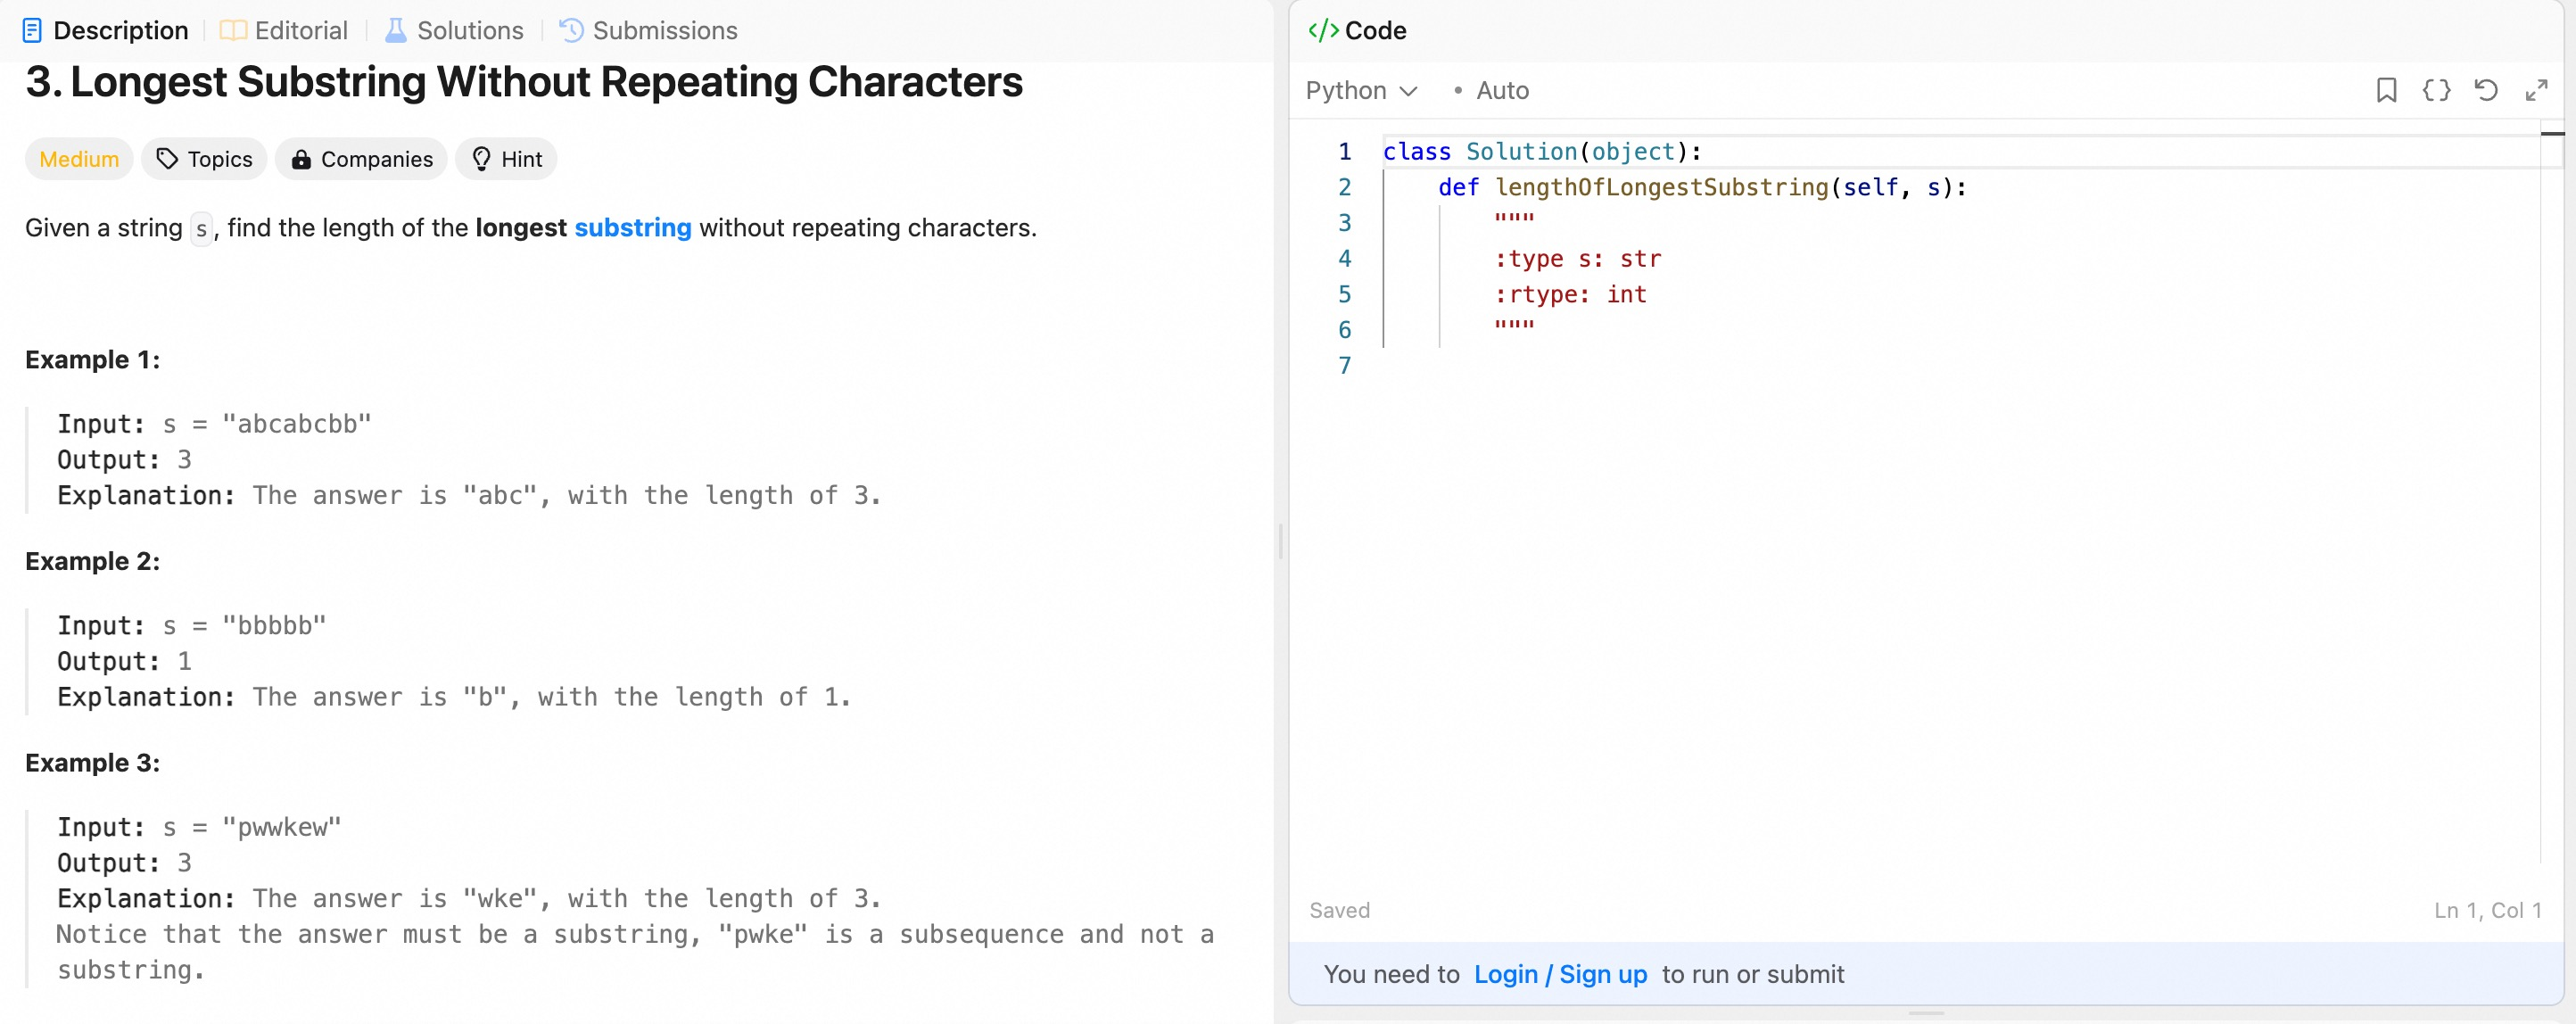

In [ ]:
image_path = "visuals/algorithm.jpg"
image = Image.open(image_path).convert("RGB")

display(image)

In [ ]:
conversation = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": {"image_path": image_path}
            },
            {
                "type": "text",
                "text": "Please solve the algorithm problem in the page and generate the python code."},
        ]
    }
]


# Single-turn conversation
inputs = processor(conversation=conversation, return_tensors="pt")
inputs = {k: v.cuda() if isinstance(v, torch.Tensor) else v for k, v in inputs.items()}
if "pixel_values" in inputs:
    inputs["pixel_values"] = inputs["pixel_values"].to(torch.bfloat16)

output_ids = model.generate(**inputs, max_new_tokens=1024)
response = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
display(Markdown(response))


The problem described is the "Longest Substring Without Repeating Characters" algorithm, which requires finding the length of the longest substring without repeating characters in a given string. To solve this problem, we can use a sliding window approach with two pointers to track the current substring and a set to keep track of unique characters within that substring. Here's how the Python code might look:

```python
def lengthOfLongestSubstring(s: str) -> int:
    if not s:
        return 0

    char_set = set()
    left = 0
    result = 0

    for right in range(len(s)):
        while s[right] in char_set:
            char_set.remove(s[left])
            left += 1
        char_set.add(s[right])
        result = max(result, right - left + 1)

    return result
```

This function initializes a set to store unique characters, a left pointer to mark the start of the current substring, and a result variable to store the maximum length found so far. It iterates over the string with a right pointer, adding characters to the set and moving the left pointer if a repeated character is found. The maximum length is updated whenever a longer substring is found.